In [1]:
import pandas as pd

### 1. What is the shape of "movies.csv"?

In [2]:
df = pd.read_csv("movies.csv")

df.shape

(9742, 3)

In [6]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### 2. What is the shape of "ratings.csv"?


In [3]:
df2 = pd.read_csv("ratings.csv")

df2.shape

(100836, 4)

In [5]:
df2.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### 3. How many unique "userId" are available in "ratings.csv"?*

In [4]:
unique_user_count = df2['userId'].nunique()

unique_user_count

610

### 4. Which movie has recieved maximum number of user ratings?*

In [7]:
ratings_count = df2['movieId'].value_counts().idxmax()

most_rated_movie = df[df['movieId'] == ratings_count]['title'].values[0]

In [8]:
most_rated_movie

'Forrest Gump (1994)'

In [9]:
df3 = pd.read_csv("tags.csv")

df3.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


### 5. Tags submitted by users to "Matrix, The (1999)" movie

In [10]:
matrix_movie_id = df[df['title'] == 'Matrix, The (1999)']['movieId'].values[0]

matrix_tags = df3[df3['movieId'] == matrix_movie_id]['tag'].unique()

In [11]:
matrix_tags

array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

### 6. What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [12]:
terminator_movie_id = df[df['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]

average_rating = df2[df2['movieId'] == terminator_movie_id]['rating'].mean()

In [13]:
average_rating

3.970982142857143

### 7. How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

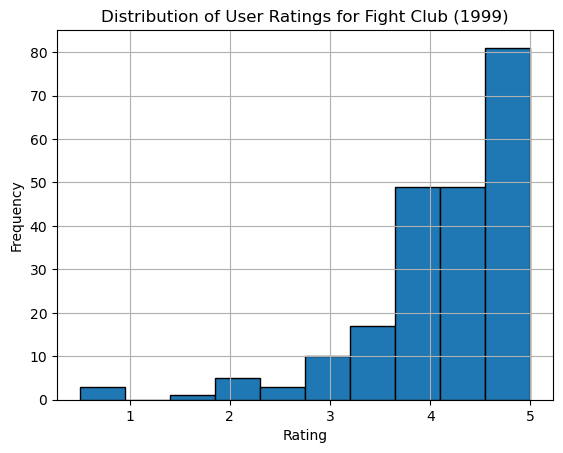

In [14]:
import matplotlib.pyplot as plt

fight_club_movie_id = df[df['title'] == 'Fight Club (1999)']['movieId'].values[0]

fight_club_ratings = df2[df2['movieId'] == fight_club_movie_id]['rating']

# histogram
plt.hist(fight_club_ratings, bins=10, edgecolor='black')
plt.title('Distribution of User Ratings for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**👆🏻 Left Skewed Distribution**

### 8. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.

In [15]:
# Group by movieId and calculate count and mean of ratings
grouped_ratings = df2.groupby('movieId').agg(rating_count=('rating', 'count'), rating_mean=('rating', 'mean')).reset_index()

### 9. Apply inner join on dataframe created from movies.csv and the grouped df from step 1

In [16]:
# Perform an inner join with the movies dataframe
merged_df = pd.merge(df, grouped_ratings, on='movieId', how='inner')

### 10. Filter only those movies which have more than 50 user ratings (i.e. > 50).

In [17]:
# Filter movies with more than 50 user ratings
filtered_df = merged_df[merged_df['rating_count'] > 50]

In [18]:
grouped_ratings.head()

,movieId,rating_count,rating_mean
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429


In [25]:
grouped_ratings.shape

(9724, 3)

In [23]:
merged_df.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429


In [22]:
merged_df.shape

(9724, 5)

In [24]:
filtered_df.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [21]:
filtered_df.shape

(436, 5)

### 11. Which movie is the most popular based on  average user ratings?

In [27]:
most_popular_movie = filtered_df.loc[filtered_df['rating_mean'].idxmax(), 'title']

most_popular_movie

'Shawshank Redemption, The (1994)'

###  12. Top 5 popular movies based on number of user ratings.

In [28]:
top_5_popular_movies = filtered_df.nlargest(5, 'rating_count')['title']

top_5_popular_movies

314                  Forrest Gump (1994)
277     Shawshank Redemption, The (1994)
257                  Pulp Fiction (1994)
510     Silence of the Lambs, The (1991)
1938                  Matrix, The (1999)
Name: title, dtype: object

### 13. Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [29]:
sci_fi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]

third_most_popular_sci_fi_movie = sci_fi_movies.nlargest(3, 'rating_count').iloc[2]['title']

third_most_popular_sci_fi_movie

'Jurassic Park (1993)'

In [30]:
df4 = pd.read_csv("links.csv")

df4.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


### 14. Web Scraping Script (Debug included)

In [40]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    
    print(f"Scraping URL: {URL}")  # Debugging output
    
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    
    response = requests.get(URL, headers=request_header)
    
    if response.status_code != 200:
        print(f"Failed to retrieve {URL}, status code: {response.status_code}")
        return np.nan
    
    soup = BeautifulSoup(response.text, 'html.parser')
    
    imdb_rating = soup.find('span', attrs={'class': 'sc-eb51e184-1 ljxVSS'})
    
    if imdb_rating:
        return imdb_rating.text
    else:
        print(f"Could not find rating for {URL}")
        return np.nan

In [43]:
merged_df = pd.merge(filtered_df, df4, on='movieId', how='left')

merged_df.shape

(436, 7)

In [44]:
merged_df['imdb_rating'] = merged_df['imdbId'].apply(scrapper)

Scraping URL: https://www.imdb.com/title/tt0114709/
Scraping URL: https://www.imdb.com/title/tt0113497/
Scraping URL: https://www.imdb.com/title/tt0113228/
Scraping URL: https://www.imdb.com/title/tt0113277/
Scraping URL: https://www.imdb.com/title/tt0114319/
Scraping URL: https://www.imdb.com/title/tt0113189/
Scraping URL: https://www.imdb.com/title/tt0112346/
Scraping URL: https://www.imdb.com/title/tt0112641/
Scraping URL: https://www.imdb.com/title/tt0114388/
Scraping URL: https://www.imdb.com/title/tt0112281/
Scraping URL: https://www.imdb.com/title/tt0113161/
Scraping URL: https://www.imdb.com/title/tt0113627/
Scraping URL: https://www.imdb.com/title/tt0114746/
Scraping URL: https://www.imdb.com/title/tt0112431/
Scraping URL: https://www.imdb.com/title/tt0112818/
Scraping URL: https://www.imdb.com/title/tt0112697/
Scraping URL: https://www.imdb.com/title/tt0114369/
Scraping URL: https://www.imdb.com/title/tt0114148/
Scraping URL: https://www.imdb.com/title/tt0114814/
Scraping URL

In [47]:
merged_df[['title', 'imdb_rating']]

,title,imdb_rating
0,Toy Story (1995),8.3
1,Jumanji (1995),7.1
2,Grumpier Old Men (1995),6.7
3,Heat (1995),8.3
4,Sabrina (1995),6.3
...,...,...
431,"Wolf of Wall Street, The (2013)",8.2
432,"Grand Budapest Hotel, The (2014)",8.1
433,Interstellar (2014),8.7
434,Guardians of the Galaxy (2014),8.0


### 15. `movieId` of the movie which has the highest IMDB rating.


In [48]:
highest_rated_movie = merged_df.loc[merged_df['imdb_rating'].idxmax()]

highest_rated_movieId = highest_rated_movie['movieId']

In [49]:
print("MovieId with the highest IMDb rating:", highest_rated_movieId)

MovieId with the highest IMDb rating: 318


### 16. `movieId` of the "Sci-Fi" movie which has the highest IMDB rating.

In [50]:
sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi')]

highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['imdb_rating'].idxmax()]

highest_rated_sci_fi_movieId = highest_rated_sci_fi_movie['movieId']

In [51]:
print("MovieId of the Sci-Fi movie with the highest IMDb rating:", highest_rated_sci_fi_movieId)

MovieId of the Sci-Fi movie with the highest IMDb rating: 79132


# THANK YOU
For a comprehensive understanding of my background, I've provided some resources below:
- `LinkedIn Profile`: https://www.linkedin.com/in/codewithcharan/
- `Portfolio Website`: https://codewithcharan.github.io/My-Portfolio/
- `GitHub Profile`: https://github.com/CodeWithCharan?tab=repositoriesHub